In [1]:
import pandas as pd
import os
import seaborn as sns
import math
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt 

The data was processed in R beforehand. 

In [2]:
data = pd.read_feather(os.path.join("..", "data", "data-posting-volume.feather"))

This is what the data looks like.

In [3]:
data

,subtime_hour,subtime_hour_scaled,mean_count_per_hour,mean_count_per_hour_standardized
0,0,0.000000,34.250000,-0.327375
1,1,0.041667,26.750000,-0.735845
2,2,0.083333,24.250000,-0.872001
3,3,0.125000,23.000000,-0.940080
4,4,0.166667,19.375000,-1.137507
5,5,0.208333,22.250000,-0.980927
6,6,0.250000,22.625000,-0.960503
7,7,0.291667,19.375000,-1.137507
8,8,0.333333,21.875000,-1.001350
9,9,0.375000,20.875000,-1.055813


The mean arrival rate per hour has a strongly periodic look.

<AxesSubplot:xlabel='subtime_hour_scaled', ylabel='mean_count_per_hour_standardized'>

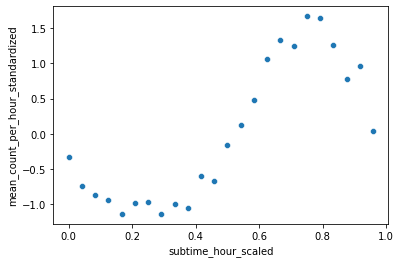

In [4]:
sns.scatterplot(x=data.subtime_hour_scaled, y=data.mean_count_per_hour_standardized)

I propose to fit this function to the data to simulate arrival rates later on in the simulation.
In mathematical notation, this is the function: $f(x) = -sin(\alpha x)$.

In [5]:
def scaled_sin(x, alpha):
    return np.array([(-1 * math.sin(alpha * i)) for i in x])

Think of the fitting process in the following way.

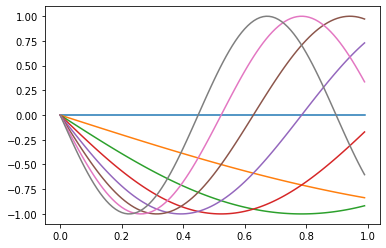

In [6]:
xdata = np.arange(0, 1, 0.01)
ydata1 = scaled_sin(xdata, 0)
ydata2 = scaled_sin(xdata, 1)
ydata3 = scaled_sin(xdata, 2)
ydata4 = scaled_sin(xdata, 3)
ydata5 = scaled_sin(xdata, 4)
ydata6 = scaled_sin(xdata, 5)
ydata7 = scaled_sin(xdata, 6)
ydata8 = scaled_sin(xdata, 7)

f, ax = plt.subplots(1)
ax.plot(xdata, ydata1)
ax.plot(xdata, ydata2)
ax.plot(xdata, ydata3)
ax.plot(xdata, ydata4)
ax.plot(xdata, ydata5)
ax.plot(xdata, ydata6)
ax.plot(xdata, ydata7)
ax.plot(xdata, ydata8)
plt.show()

An argument could be made to add a second parameter to fit the amplitude as well, which would yield the following function: $f(x) = -\beta sin(\alpha x)$

We treat the scaled time axis as our predictors and try to fit the above function to predict the mean arrival rate per hour. As we are fitting a continuous function, estimation the single parameter of the function can later on be used to produce values at will. 

In [7]:
xdata = data.subtime_hour_scaled.values
ydata = data.mean_count_per_hour_standardized.values

Note that the value 6 is given as an initial value for the parameter estimation. If no initial value is supplied, the estimator underfits the data.

In [8]:
estimation = curve_fit(scaled_sin, xdata, ydata, 6)

This is the function parameter that we estimated. 

In [9]:
estimation[0][0]

6.17725586778391

With this parameter, the function looks like this.

<AxesSubplot:>

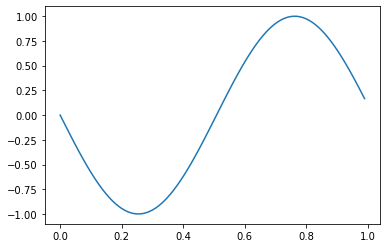

In [10]:
sns.lineplot(x=np.arange(0., 1., 0.01), y=scaled_sin(np.arange(0., 1., 0.01), estimation[0][0]))

Let's now look if this fit has face validity.

In [11]:
data['pred'] = scaled_sin(data.subtime_hour_scaled, estimation[0][0])

In [12]:
xdata = data.subtime_hour_scaled
ydata1 = data.mean_count_per_hour_standardized
ydata2 = data.pred

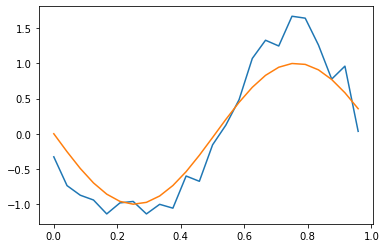

In [13]:
f, ax = plt.subplots(1)
ax.plot(xdata, ydata1)
ax.plot(xdata, ydata2)
plt.show()

Is this good enough?














